# Project Title - LOAN RISK
In this project we will analyse differnt factors on which the loan status can possibly depend .I will be exploring the dataset loan-data from kaggle by using pandas and matplotlib.This is my course project for Data Analysis with Python: Zero to Pandas.
This was indeed a very good learning experience for me.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
!pip install sklearn

# LET'S IMPORT ALL THE NECESAARY LIBRARIES 

In [3]:
try: 
   from pandas import get_dummies
   from scipy import stats
   import matplotlib.pyplot as plt
   import seaborn as sns
   import pandas as pd
   import numpy as np
   import warnings
   import sklearn
   import sys
   import os
   warnings.filterwarnings('ignore')
   DeprecationWarning('ignore')
   print('All modules are imported')
except:
   raise ModuleNotFoundError

All modules are imported


# Let's import the dataset from kaggle

In [4]:
dataset_url = 'https://www.kaggle.com/pallavi31/loan-data' 

In [5]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: snigdhabiswas
Your Kaggle Key: ········


100%|██████████| 12.6k/12.6k [00:00<00:00, 4.02MB/s]

The dataset has been downloaded and extracted.

In [6]:
data_dir = './loan-data'

In [7]:
os.listdir(data_dir)

['Loan_Training_data.csv', 'Loan_Test_Data.csv']

Let us save and upload our work to Jovian before continuing.

In [8]:
project_name = "zerotopandas-course-project-LoanRisk" 

In [9]:
!pip install jovian --upgrade -q

In [10]:
import jovian

In [11]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Creating a new project "snigdhaabiswas/zerotopandas-course-project-LoanRisk"
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/snigdhaabiswas/zerotopandas-course-project-loanrisk


'https://jovian.ml/snigdhaabiswas/zerotopandas-course-project-loanrisk'

## Data Preparation and Cleaning

In [12]:
df = pd.read_csv('./loan-data/Loan_Training_data.csv')
print('Data imported')

Data imported


In [13]:
type(df)

pandas.core.frame.DataFrame

In [14]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [15]:
df.shape

(614, 13)

In [16]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [18]:
table = df.groupby(['Gender','Married','Education','Self_Employed'])
table.size()


Gender  Married  Education     Self_Employed
Female  No       Graduate      No                53
                               Yes                8
                 Not Graduate  No                10
                               Yes                3
        Yes      Graduate      No                21
                               Yes                3
                 Not Graduate  No                 4
                               Yes                1
Male    No       Graduate      No                81
                               Yes               12
                 Not Graduate  No                25
                               Yes                4
        Yes      Graduate      No               223
                               Yes               38
                 Not Graduate  No                71
                               Yes                9
dtype: int64

In [19]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


# Let's check our data for null values

In [20]:
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Exploratory Analysis and Visualization

<AxesSubplot:>

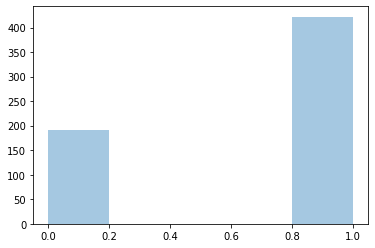

In [23]:
sns.distplot(np.where(df['Loan_Status']=='Y',1,0), hist = True, kde= False)

This shows that people getting their loan approved is significantly higher than people getting their loan rejected.

In [24]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size= 0.2, random_state=112)

splitted the data into train and test as it might cause biasness during filling of data

In [25]:
train.shape


(491, 13)

In [26]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               2
Dependents           12
Education             0
Self_Employed        22
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           19
Loan_Amount_Term      9
Credit_History       40
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
train= train.drop(['Loan_ID','Gender'], axis =1)

# Now let us analyse the missing data columns

<AxesSubplot:xlabel='Married', ylabel='count'>

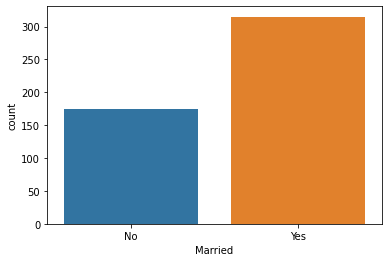

In [28]:
sns.countplot(train.Married)

We can see that the majority of the loan applicants are married.

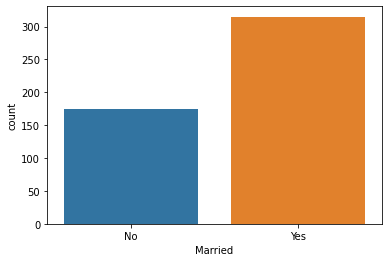

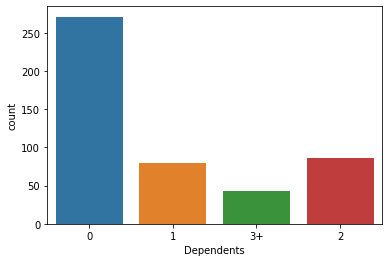

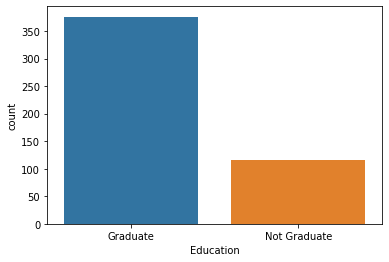

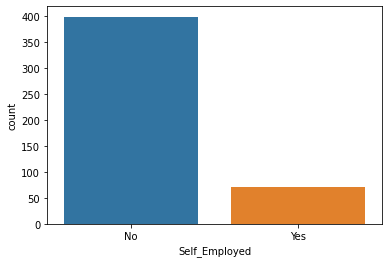

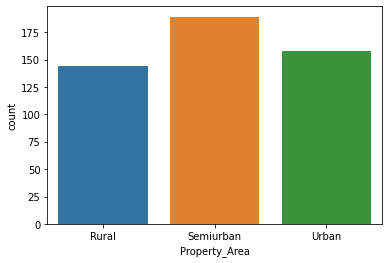

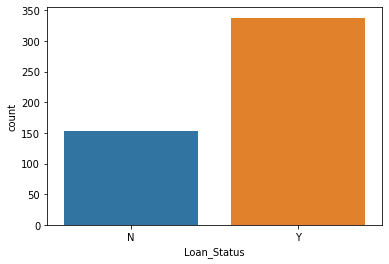

In [29]:
cat = train.select_dtypes(include = object)
for col in cat:
   sns.countplot(train[col].dropna())
   plt.show()

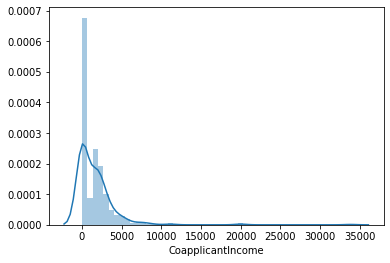

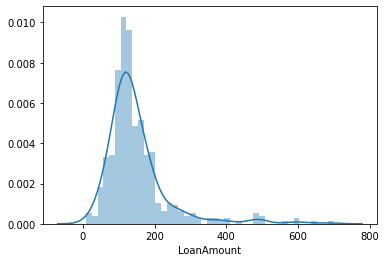

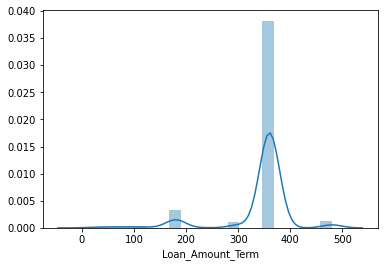

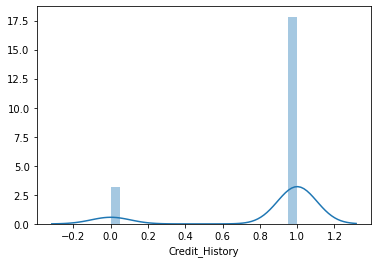

In [30]:
cat = train.select_dtypes(include= float)
for col in cat:
   sns.distplot(train[col].dropna())
   plt.show()

# Now let us fill the null values accordingly

In [31]:
def fill_married(df):
   df.Married.fillna('Yes', inplace= True)
   return df
def fill_dependent(df):
   df.Dependents.fillna('Yes', inplace= True)
   return df
def fill_employed(df):
   df.Self_Employed.fillna('No', inplace = True)
   return df
def loanamount(df):
   df.LoanAmount.fillna(128, inplace = True)
   return df
def credit_hist(df):
   df.Credit_History.fillna(1, inplace= True)
   return df
def term(df):
   df.Loan_Amount_Term.fillna(360, inplace= True)
   return df
def dependents(df):
   df.Dependents.fillna('0', inplace= True)
   return df
def filling_data(df):

   df =fill_married(df)
   df = fill_dependent(df)
   df = fill_employed(df)
   df= loanamount(df)
   df= credit_hist(df)
   df= term(df)
   df = dependents(df)
   return df

In [32]:
train = filling_data(train)

In [33]:
train.isnull().sum()

Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
train.tail()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
197,No,0,Not Graduate,No,1907,2365.0,120.0,360.0,1.0,Urban,Y
321,Yes,3+,Graduate,No,4342,189.0,124.0,360.0,1.0,Semiurban,Y
474,No,2,Graduate,No,5532,4648.0,162.0,360.0,1.0,Rural,Y
232,No,0,Not Graduate,No,3189,2598.0,120.0,360.0,1.0,Rural,Y
612,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Now let us encode our data using label encoder

In [35]:
def changing_label(df):
   cat = df.select_dtypes(object)
   for col in cat:
      label = sklearn.preprocessing.LabelEncoder()
      df[col]= label.fit_transform(df[col])
   return df

In [36]:
 train = changing_label(train)

In [37]:
train.sample(6)

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
531,1,3,0,0,4281,0.0,100.0,360.0,1.0,2,1
5,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
540,1,1,0,0,4608,2845.0,140.0,180.0,1.0,1,1
445,1,1,0,1,3466,1210.0,130.0,360.0,1.0,0,1
592,0,3,0,1,9357,0.0,292.0,360.0,1.0,1,1
187,1,0,0,0,2383,2138.0,58.0,360.0,1.0,0,1


In [38]:
train.describe()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.645621,0.871690,0.234216,0.144603,5561.857434,1595.529124,148.389002,342.232179,0.861507,1.028513,0.688391
std,0.478812,1.132918,0.423940,0.352059,6638.791636,2602.191261,88.095365,66.026858,0.345769,0.784546,0.463623
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2917.000000,0.000000,104.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,3762.000000,1213.000000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,2.000000,0.000000,0.000000,5818.500000,2331.500000,162.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,1.000000,1.000000,81000.000000,33837.000000,700.000000,480.000000,1.000000,2.000000,1.000000


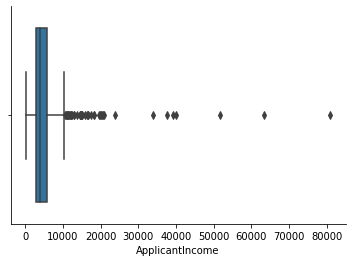

In [39]:
sns.boxplot(train['ApplicantIncome'])
sns.despine()

In [40]:
IQR_app = train.ApplicantIncome.quantile(0.75) - train.ApplicantIncome.quantile(0.25)
upper_limit_app = train.ApplicantIncome.quantile(0.75) + (IQR_app*1.5)
upper_limit_extreme_app = train.ApplicantIncome.quantile(0.75) + (IQR_app*2)
upper_limit_app, upper_limit_extreme_app

(10170.75, 11621.5)

In [41]:
outlier_count_app = len(train[(train['ApplicantIncome'] > upper_limit_app)])
outlier_count_app

42

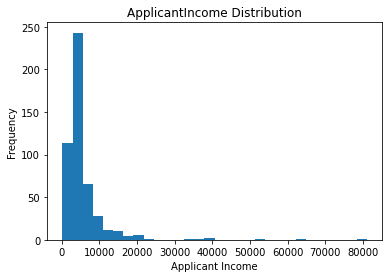

In [42]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(train['ApplicantIncome'], bins=30)
plt.title('ApplicantIncome Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

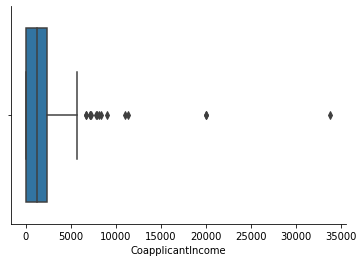

In [43]:
sns.boxplot(train['CoapplicantIncome'])
sns.despine()

In [44]:
IQR_loanAmt = train.LoanAmount.quantile(0.75) - train.LoanAmount.quantile(0.25)
upper_limit_loanAmt = train.LoanAmount.quantile(0.75) + (IQR_loanAmt*1.5)
upper_limit_extreme_loanAmt = train.LoanAmount.quantile(0.75) + (IQR_loanAmt*2)
upper_limit_loanAmt, upper_limit_extreme_loanAmt

(249.0, 278.0)

In [45]:
outlier_count_loanAmt = len(train[(train['LoanAmount'] > upper_limit_loanAmt)])
outlier_count_loanAmt

42

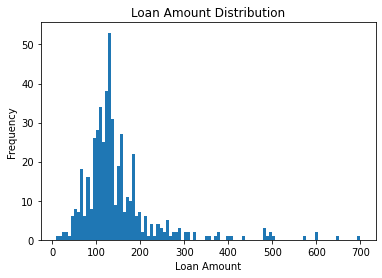

In [46]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(train['LoanAmount'], bins=100)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 308 to 612
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            491 non-null    int64  
 1   Dependents         491 non-null    int64  
 2   Education          491 non-null    int64  
 3   Self_Employed      491 non-null    int64  
 4   ApplicantIncome    491 non-null    int64  
 5   CoapplicantIncome  491 non-null    float64
 6   LoanAmount         491 non-null    float64
 7   Loan_Amount_Term   491 non-null    float64
 8   Credit_History     491 non-null    float64
 9   Property_Area      491 non-null    int64  
 10  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 66.0 KB


In [48]:
train.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
308,0,0,0,0,20233,0.0,480.0,360.0,1.0,0,0
115,1,1,0,0,14583,0.0,185.0,180.0,1.0,0,1
601,1,0,1,0,2894,2792.0,155.0,360.0,1.0,0,1
138,0,0,0,0,14999,0.0,242.0,360.0,0.0,1,0
192,1,0,1,0,6033,0.0,160.0,360.0,1.0,2,0


<AxesSubplot:>

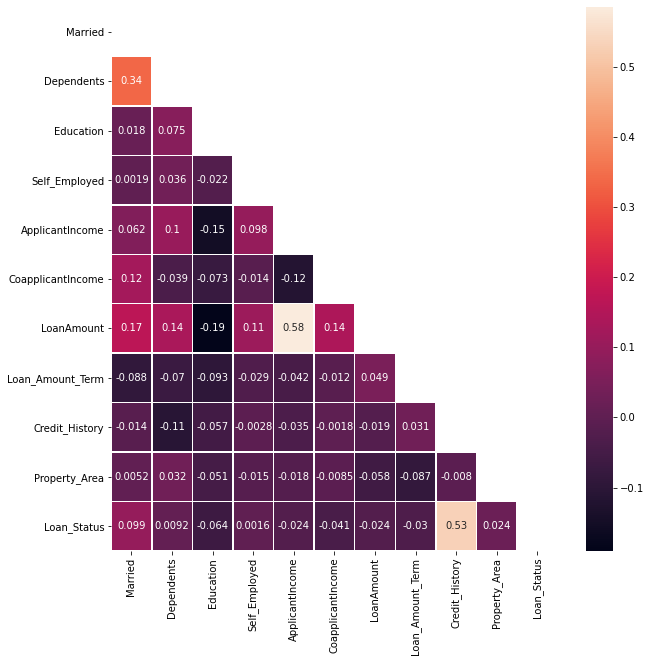

In [49]:
matrix = np.triu(train.corr())
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(train.corr(), annot = True, mask = matrix, linewidths = .5, ax = ax)

In [50]:
import jovian

In [51]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "snigdhaabiswas/zerotopandas-course-project-loanrisk" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/snigdhaabiswas/zerotopandas-course-project-loanrisk


'https://jovian.ml/snigdhaabiswas/zerotopandas-course-project-loanrisk'

Let us save and upload our work to Jovian before continuing

In [52]:
import jovian

In [53]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "snigdhaabiswas/zerotopandas-course-project-loanrisk" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/snigdhaabiswas/zerotopandas-course-project-loanrisk


'https://jovian.ml/snigdhaabiswas/zerotopandas-course-project-loanrisk'

## Asking and Answering Questions
I have answered a few questions which I think are frequently asked.Feel free to contact me inacse of furthur queries.



#### QUESTION 1:
    WHY DID YOU DROP 'GENDER' AND 'LOAN-ID'?

In [54]:
tbl = pd.crosstab(index = df['Loan_Status'], columns = df['Gender'])


<AxesSubplot:xlabel='Loan Status'>

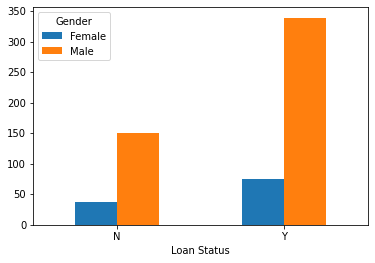

In [55]:
tbl.plot.bar(xlabel = 'Loan Status', rot = 0)


#### QUESTION 2:
   CAN WE USE MACHINE LEARNING TO TRAIN AND TEST THIS DATA MODEL?

In [56]:
def x_y(df):
   x = df.drop(['Loan_Status'], axis= 1)
   y= df['Loan_Status']
   return x,y

In [57]:
x_train, y_train = x_y(train)

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
dec_model = DecisionTreeClassifier(criterion= 'entropy',max_depth= 2,max_features=
6,random_state=15,min_samples_leaf=2)
dec_model.fit(x_train, y_train)
predict= dec_model.predict(x_train)
score = accuracy_score(y_train, predict)
print(score)

0.8065173116089613


In [64]:
def test_functions(df):
   df= filling_data(df)
   df = changing_label(df)
   df=df.drop(['Loan_ID','Gender'], axis =1)
   x, y = x_y(df)
   return x, y
x_test, y_test = test_functions(test)

In [65]:
test_score= accuracy_score(y_test, dec_model.predict(x_test))
print(test_score)

0.8211382113821138


#### QUESTION 3:
   CAN WE SAY THAT A DATASET CONTAINS NULL VALUES WITHOUT USING isnull()?

In [66]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


THERE IS NOTABLY A LARGE DIFFERENCE BETWEEN THE 75TH PERCENTILE AND MAX VALUES OF ALL THREE VARIABLES .THIS SUGGESTS THAT THE THERE ARE NULL VALUE IN OUR DATA SET.

#### QUESTION 4:
    WHAT IS THE RELATIONSHIP BETWEEN APLLICANT INCOME AND LOAN AMOUNT?

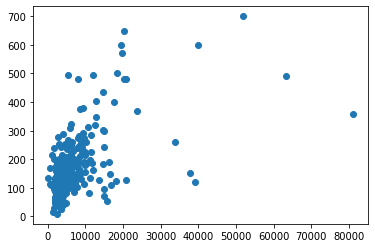

In [67]:
plt.scatter(train['ApplicantIncome'], train['LoanAmount'])
plt.show()

#### QUESTION 5:
   DOES EDUCATION AFFECT THE LOAN STATUS ?

In [68]:
pd.crosstab(df.Education, df.Loan_Status)


Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [69]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df.Education, df.Loan_Status))

(4.091490413303621,
 0.04309962129357355,
 1,
 array([[150.09771987, 329.90228013],
        [ 41.90228013,  92.09771987]]))

Let us save and upload our work to Jovian before continuing.

In [70]:
import jovian

In [71]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "snigdhaabiswas/zerotopandas-course-project-loanrisk" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/snigdhaabiswas/zerotopandas-course-project-loanrisk


'https://jovian.ml/snigdhaabiswas/zerotopandas-course-project-loanrisk'

## Inferences and Conclusion
IN THIS PROJECT I HAVE APPLIED SIMPLE DATA ANAYLYSIS TECHNIQUES TO UNDERSTAND THE RELATION BETWEEN DIFFERENT FACTORS.THIS HELPS US TO UNDERSTAND THE FACTORS ON WHICH THE LOAN ACCEPTANCE AND REJECTION OF A SPECIFIC AMOUNT DEPENDS.
I HAVE USED LIBRARIES SUCH AS PANDAS ,MTAPLOTLIB ,SKLEARN ETC TO COMPLETE MY TASK.


In [72]:
import jovian

In [73]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "snigdhaabiswas/zerotopandas-course-project-loanrisk" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/snigdhaabiswas/zerotopandas-course-project-loanrisk


'https://jovian.ml/snigdhaabiswas/zerotopandas-course-project-loanrisk'

## References and Future Work
TO INCREASE THE SCOPE OF THIS PROJECT,
WE CAN USE DIFFRENT CLASSIFICATION TECHNIQUES TO PREDICT THE LOAN STATUS OF A PERSON GIVEN THE VARIOUS DETAILS.
REFERENCES:
https://ourcodingclub.github.io/tutorials/pandas-python-intro/
https://www.geeksforgeeks.org/different-plotting-using-pandas-and-matplotlib/


> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [ ]:
import jovian

In [ ]:
jovian.commit()